# CellMap for human bone marrow cell data

The analysis example using human bone marrow cell data ([Setty et al. (2019)](https://doi.org/10.1242/dev.173849)). 

[RECODE](https://github.com/yusuke-imoto-lab/RECODE) and [UNitVelo](https://ui.adsabs.harvard.edu/link_gateway/2022NatCo..13.6586G/doi:10.1038/s41467-022-34188-7) are used for the noise reduction and velocity inference, respectively.

## Regular procedure

In [1]:
import cellmap
import anndata
import matplotlib.pyplot as plt
import numpy as np
import scanpy

The dataset is installed using the [scvelo](https://scvelo.readthedocs.io/en/stable/) package. 

In [2]:
import scvelo as scv
adata = scv.datasets.bonemarrow()
adata

AnnData object with n_obs × n_vars = 5780 × 14319
    obs: 'clusters', 'palantir_pseudotime'
    uns: 'clusters_colors'
    obsm: 'X_tsne'
    layers: 'spliced', 'unspliced'

Noise reduction by [RECODE](https://github.com/yusuke-imoto-lab/RECODE).

start RECODE for scRNA-seq
end RECODE for scRNA-seq
log: {'seq_target': 'RNA', '#significant genes': 8503, '#non-significant genes': 4792, '#silent genes': 1024, 'ell': 73, 'Elapsed time': datetime.timedelta(seconds=84, microseconds=792533)}


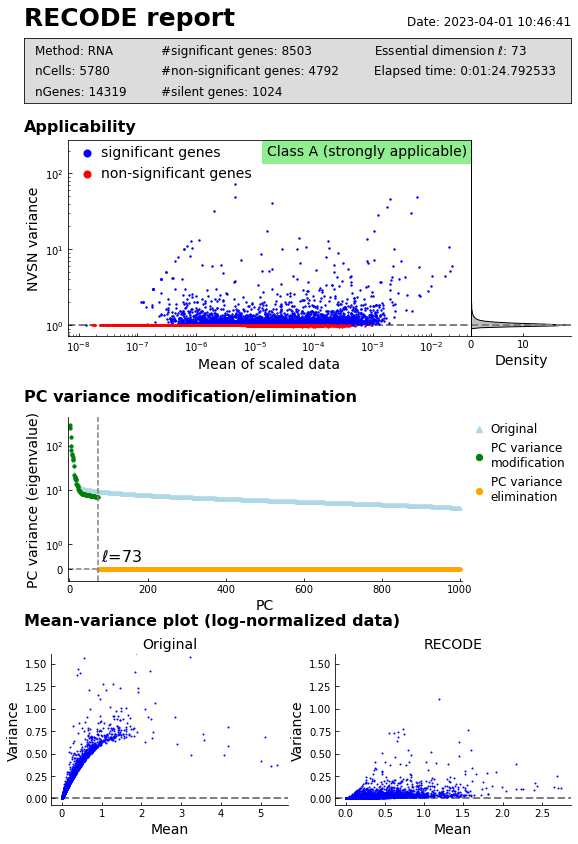

In [3]:
import screcode
recode = screcode.RECODE()
adata = recode.fit_transform(adata)
adata.layers['RECODE_log'] = scanpy.pp.log1p(adata.obsm['RECODE'])
recode.report()

Compute velocity by UnitVelo and show the stream on UMAP. 

(Running UniTVelo 0.2.5.2)
2023-04-01 01:46:45
------> Manully Specified Parameters <------
R2_ADJUST:	False
VGENES:	offset
IROOT:	HSC_1
------> Model Configuration Settings <------
N_TOP_GENES:	2000
LEARNING_RATE:	0.01
FIT_OPTION:	1
DENSITY:	SVD
REORDER_CELL:	Soft_Reorder
AGGREGATE_T:	True
GENE_PRIOR:	None
--------------------------------------------

Current working dir is /mnt/d/GitHub/CellMap/tutorial.
Results will be stored in res folder
Filtered out 7837 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.
Extracted 2000 highly variable genes.
Computing moments for 2000 genes with n_neighbors: 30 and n_pcs: 30
computing neighbors
    finished (0:00:10) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)

# of ve

Loss (Total): 4508.237, (Spliced): 2284.185, (Unspliced): 2224.052: 100%|██████▉| 11999/12000 [1:29:10<00:00,  3.12it/s]

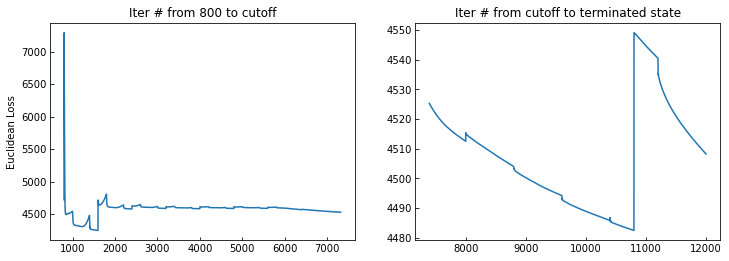

Loss (Total): 4508.237, (Spliced): 2284.185, (Unspliced): 2224.052: 100%|██████▉| 11999/12000 [1:30:35<00:00,  2.21it/s]

Total loss 4482.493, vgene loss 4508.237


  0%|          | 0/5780 [00:00<?, ?cells/s]

In [4]:
import unitvelo as utv

velo_config = utv.config.Configuration()
velo_config.VGENES = 'offset'
velo_config.R2_ADJUST = False
velo_config.IROOT = 'HSC_1'
velo_config.FIT_OPTION = '1'
adata = utv.run_model(adata,label = 'clusters', config_file=velo_config)

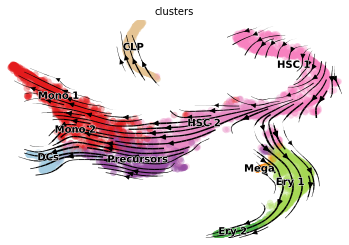

In [5]:
scv.pl.velocity_embedding_stream(adata)

In [6]:
%%time
import cellmap

cellmap.Hodge_decomposition(adata, exp_2d_key='X_tsne', vel_2d_key='velocity_tsne', alpha=0.05)

{'Contribution_ratio': {'Potential': '87.61%', 'Rotation': '12.39%'}}
CPU times: user 1min 15s, sys: 13.4 s, total: 1min 28s
Wall time: 13.8 s


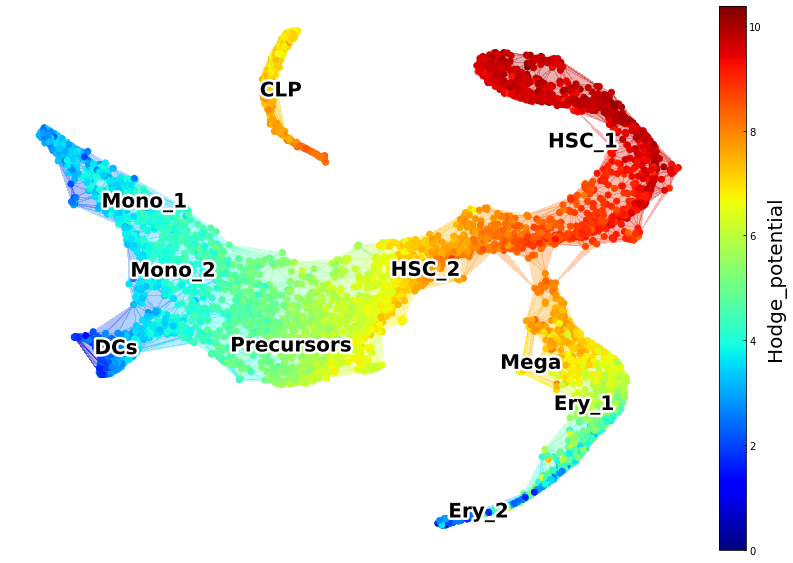

In [7]:
cellmap.view(adata, basis='X_tsne', show_graph = True, cluster_key='clusters', cmap='jet')

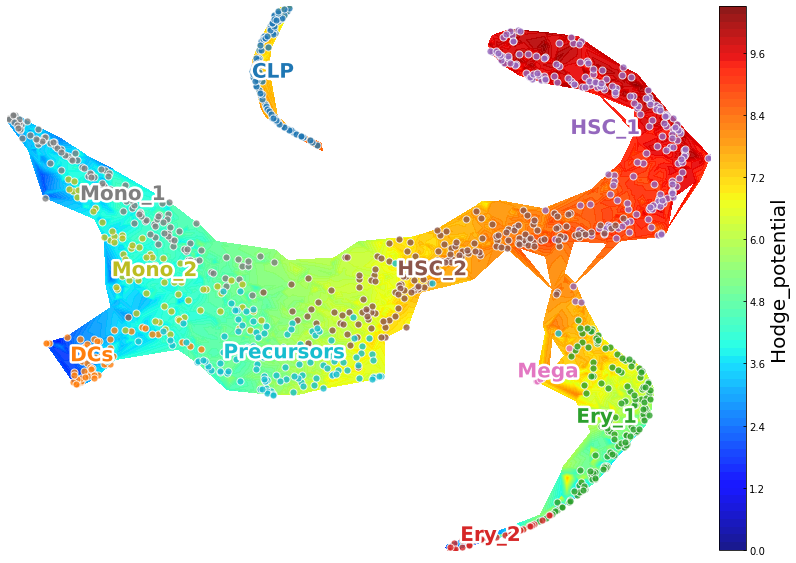

In [8]:
cellmap.view_cluster(adata, basis='X_tsne', show_graph=True, cluster_key='clusters', s=50,cmap='jet')

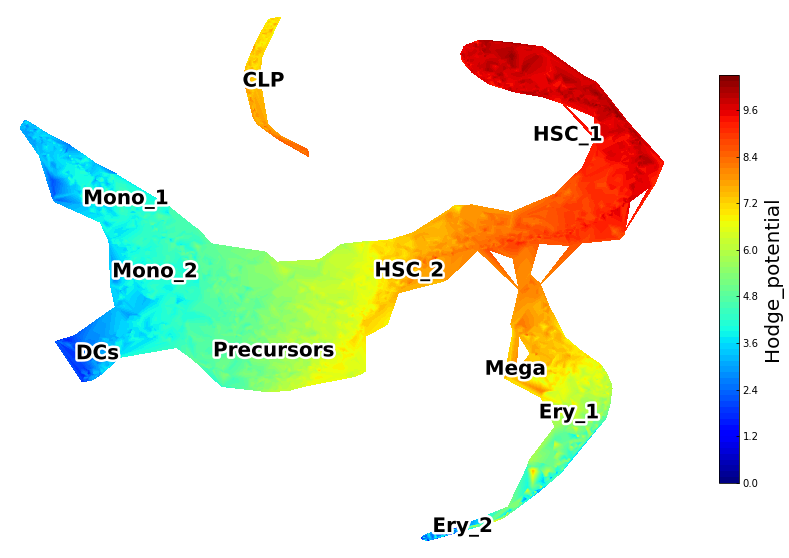

In [9]:
cellmap.view_surface(adata, basis='X_tsne', cluster_key ='clusters',cmap='jet')

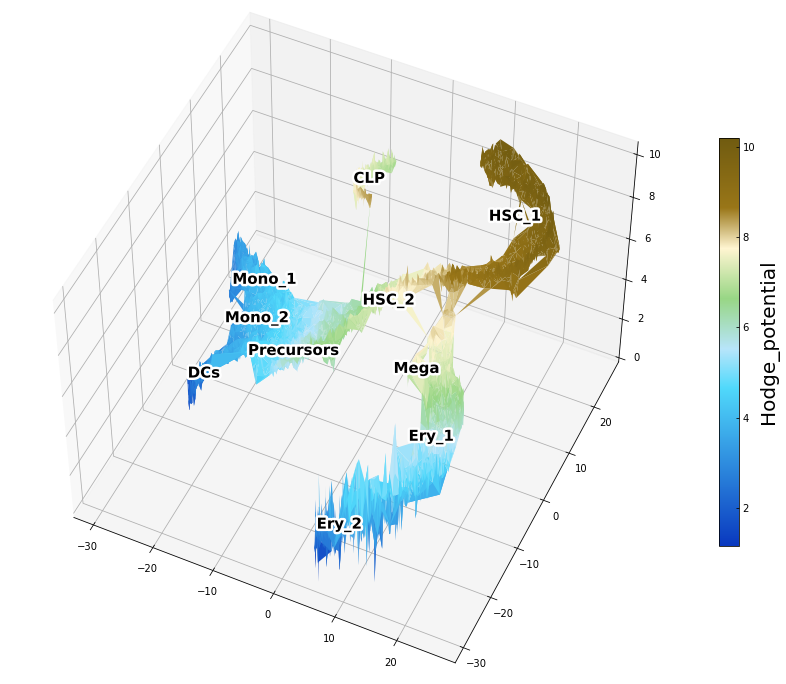

In [21]:
cellmap.view_surface_3D(adata, basis='X_tsne', cluster_key ='clusters', elev=50, azim=-65)

500 5780 500


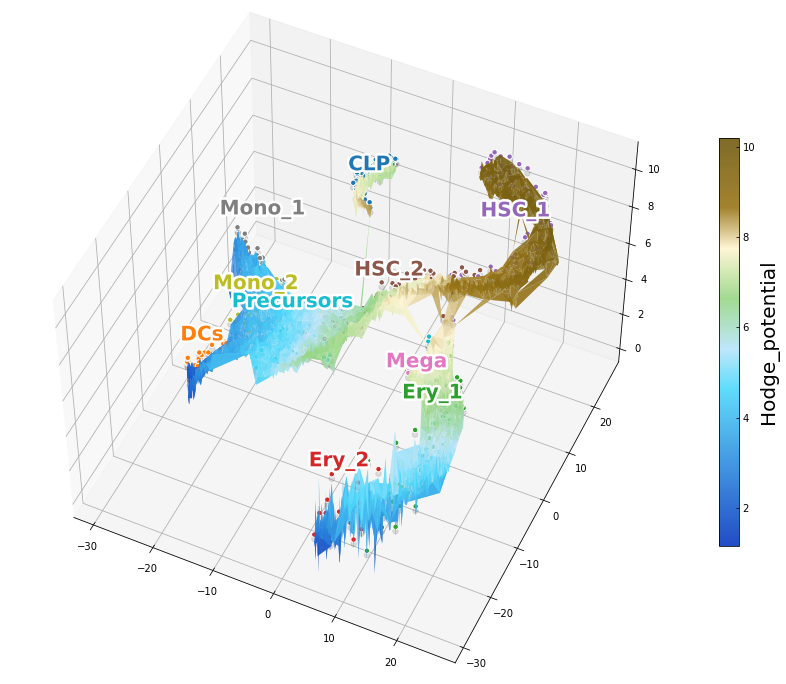

In [22]:
cellmap.view_surface_3D_cluster(adata, basis='X_tsne', cluster_key ='clusters',elev=50,azim=-65,s=30);

### Write expression and potential data as CSV file for **[CellMap viewer](https://github.com/yusuke-imoto-lab/CellMapViewer)**. 

In [17]:
cellmap.write(adata, basis='X_tsne', filename='CellMap_tutorial_bonemarrow')

succeeded in writing CellMapp data as "CellMap_tutorial_bonemarrow.csv"
You can visualize the CDV file by CellMapp viewer https://yusuke-imoto-lab.github.io/CellMapViewer/CellMapViewer/viewer.html


,X,Y,Potential,Annotation,HVG_JCHAIN,HVG_FCER1A,HVG_AHSP,HVG_CD9,HVG_CA1,HVG_AKAP12,HVG_FAM178B,HVG_IRF8,HVG_CSTA,HVG_APOC1
CellID,,,,,,,,,,,,,,
Run4_120703408880541,20.768065,-12.993637,6.155237,Ery_1,0.000000,1.812326,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Run4_120703409056541,18.920892,17.474563,9.556567,HSC_1,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Run4_120703409580963,-29.192256,14.729241,3.004248,Mono_1,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.644821,2.438008,0.000000
Run4_120703423990708,-28.510074,14.383613,3.160230,Mono_1,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.957074,0.000000
Run4_120703424252854,-16.982135,-8.072081,3.970638,Precursors,2.322505,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Run5_241114589051630,9.135791,-27.560778,1.630397,Ery_2,0.000000,0.000000,2.223739,0.0,2.362311,0.000000,1.718972,0.000000,0.000000,1.718972
Run5_241114589051819,0.692070,-4.829238,6.692530,HSC_2,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Run5_241114589128940,-0.536134,-11.431524,6.035501,Precursors,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.560541,0.000000


## Changing parameter $\alpha$

The parameter $\alpha$ adjust the rate of original/reduced dimensional information of gene expression and velocity. 

$\alpha=0$ uses only two-dimensional inormation; in contrast, $\alpha=1$ uses the original (non-dimensionaly reduction) information. 

In [ ]:
alpha_set = [0,0.5,1]
for alpha in alpha_set:
    cellmap.Hodge_decomposition(adata, exp_2d_key='X_tsne', vel_2d_key='velocity_tsne',potential_key='Hodge_potential_%0.1f' % alpha,alpha=alpha)
adata

In [ ]:
for alpha in alpha_set:
    cellmap.view(adata, basis='X_tsne', show_graph = True, potential_key='Hodge_potential_%0.1f' % alpha,cluster_key='clusters',title='alpha=%0.1f' % alpha,s=1)

In [ ]:
for alpha in alpha_set:
    cellmap.view_surface_3D(adata, basis='X_tsne', cluster_key ='clusters',potential_key='Hodge_potential_%0.1f' % alpha,elev=50,azim=65,title='alpha=%0.1f' % alpha)